In [22]:
from postproc import vdz_watertable
import numpy as np
from pylab import *

%matplotlib inline

In [2]:
factors = np.array([[2.0],  # <- bottom
                    [2.0],
                    [2.0],
                    [1.0],
                    [1.0],
                    [1.0],
                    [0.5],
                    [0.5],
                    [0.5],
                    [0.5]]) # <- top

In [9]:
mats = []

for i in range(0,24):
    infnam='slopes_only.out.satur.%05d.pfb' %i
    outfnam = 'watertable.out.%s.pfb' %i
    
    a = vdz_watertable(pfbinfnam = infnam, vdzarr = factors, pfboutfnam = outfnam, 
         nx = 12, ny = 10, nz = 10, dx = 10, dy = 10, dz = 1)
    
    mats.append(a)
    



In [10]:
len(mats)

24

In [11]:
a

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  2.5,  3.5,  4.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  2.5,  3.5,  4.5,  6.5],
       [ 0. ,  0. ,  0. ,  0. ,  1. ,  2.5,  3.5,  4.5,  6.5,  6.5],
       [ 0. ,  0.5,  0.5,  0.5,  2.5,  3.5,  4.5,  6.5,  6.5,  8.5],
       [ 0. ,  0.5,  1. ,  2.5,  3.5,  4.5,  6.5,  6.5,  8.5,  8.5],
       [ 0.5,  1. ,  1.5,  3.5,  4.5,  6.5,  6.5,  8.5,  8.5, 10.5],
       [ 0.5,  1.5,  3.5,  3.5,  4.5,  6.5,  8.5,  8.5,  8.5, 10.5],
       [ 1. ,  2.5,  3.5,  4.5,  6.5,  6.5,  8.5,  8.5, 10.5, 10.5],
       [ 2.5,  3.5,  4.5,  6.5,  6.5,  8.5,  8.5, 10.5, 10.5, 10.5],
       [ 2.5,  3.5,  6.5,  6.5,  8.5,  8.5, 10.5, 10.5, 10.5, 10.5],
       [ 3.5,  4.5,  6.5,  8.5,  8.5, 10.5, 10.5, 10.5, 10.5, 10.5],
       [ 4.5,  6.5,  8.5,  8.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5]])

In [5]:
print(vdz_watertable.__doc__)

arrout = vdz_watertable(pfbinfnam,vdzarr,pfboutfnam,nx,ny,dx,dy,dz,[nz])

Wrapper for ``vdz_watertable``.

Parameters
----------
pfbinfnam : input string(len=-1)
vdzarr : input rank-2 array('d') with bounds (nz,1)
pfboutfnam : input string(len=-1)
nx : input int
ny : input int
dx : input float
dy : input float
dz : input float

Other Parameters
----------------
nz : input int, optional
    Default: shape(vdzarr,0)

Returns
-------
arrout : rank-2 array('d') with bounds (nx,ny)



## Stack all matrixes into one 3d array

In [13]:
newarray = np.dstack(mats)
newarray.shape

(12, 10, 24)

### standard deviation across time, for each location

In [15]:
s = np.std(newarray, axis = 2)
s.shape

(12, 10)

In [16]:
s

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.09991316, 0.22726484, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.21650635, 0.40771637, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.186339  , 0.39473532, 0.6993921 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.22726484, 0.61201795, 1.47196014, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.45452967, 1.1785113 , 1.5908538

### mean water table depth for each location

In [19]:
m = np.mean(newarray, axis = 2)
print(m.shape)
m

(12, 10)


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  2.5       ,  3.5       ,  4.5       ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  2.5       ,  3.5       ,  4.5       ,  6.5       ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         2.5       ,  3.5       ,  4.5       ,  6.5       ,  6.5       ],
       [ 0.        ,  0.02083333,  0.14583333,  0.5       ,  2.5       ,
         3.5       ,  4.5       ,  6.5       ,  6.5       ,  8.5       ],
       [ 0.        ,  0.125     ,  0.39583333,  2.5       ,  3.5       ,
         4.5       ,  6.5       ,  6.5       ,  8.5       ,  8.5       ],
       [ 0.08333333,  0.35416667,  0.97916667,  3.5       ,  4.5       ,
         6.5       ,  6.5       ,  8.5       ,  8.5       , 10.5       ],
       [ 0.14583333,  0.72916667,  2.        ,  3.5       ,  4.5       ,
         6.5       ,  8.5       ,  8.5       

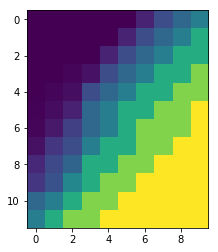

In [24]:
imshow(m)